In [15]:
import pandas as pd
import sys

In [2]:
# xls to xlsx
import win32com.client as win32

In [39]:
year = 2020
month = 6
weeks = 1

while month >= 6 and month <= 8:
    globals()['Jeju_{}_{}'.format(month, year)] = []
    globals()['Seoul_{}_{}'.format(month, year)] = []
    globals()['Daejeon_{}_{}'.format(month, year)] = []
    globals()['Jeonju_{}_{}'.format(month, year)] = []
    try:
        while True:
            fname = "C:\\Users\\YSM\\Downloads\\{}년 {}월 {}주.xls".format(year, month, weeks)
            excel = win32.gencache.EnsureDispatch('Excel.Application')
            wb = excel.Workbooks.Open(fname)

            wb.SaveAs(fname+"x", FileFormat = 51)
            wb.Close()
            excel.Application.Quit()
            df = pd.read_excel('C:\\Users\\YSM\\Downloads\\{}년 {}월 {}주.xlsx'.format(year, month, weeks))
            
            weeks += 1

            length = len(df.iloc[-1]) - 5
            
            # Jeju
            Jeju_price_list = []
            for i in range(length):
                x = df.iloc[-1][2:-3][i].replace(',', '')
                Jeju_price_list.append(int(x))
            Jeju_avg = sum(Jeju_price_list) / length
            globals()['Jeju_{}_{}'.format(month, year)].append(round(Jeju_avg, 2))  # 매주 평균값을 해당 월 리스트에 저장

            # Seoul
            Seoul_price_list = []
            Seoul_idx = df[df['구분'] == '서울'].index
            Busan_idx = df[df['구분'] == '부산'].index
            Seoul_df = df.iloc[Seoul_idx.tolist()[0]:Busan_idx.tolist()[0]]
            Seoul_price = 0
            temp = Seoul_df[Seoul_df['Unnamed: 1'] == 'C-유통'].index.tolist()[0]
            for i in range(length):
                x = Seoul_df.iloc[-1][2:-3][i].replace(',', '')
                Seoul_price_list.append(int(x))
            Seoul_avg = sum(Seoul_price_list) / length
            globals()['Seoul_{}_{}'.format(month, year)].append(round(Seoul_avg, 2))

            # Daejeon
            Daejeon_price_list = []
            Daejeon_idx = df[df['구분'] == '대전'].index
            Ulsan_idx = df[df['구분'] == '울산'].index
            Daejeon_df = df.iloc[Daejeon_idx.tolist()[0]:Ulsan_idx.tolist()[0]]
            Daejeon_price = 0
            temp = Daejeon_df[Daejeon_df['Unnamed: 1'] == 'C-유통'].index.tolist()[0]
            for i in range(length):
                x = Daejeon_df.iloc[-1][2:-3][i].replace(',', '')
                Daejeon_price_list.append(int(x))
            Daejeon_avg = sum(Daejeon_price_list) / length
            globals()['Daejeon_{}_{}'.format(month, year)].append(round(Daejeon_avg, 2))

            # Jeonju
            Jeonju_price_list = []
            Jeonju_idx = df[df['구분'] == '전주'].index
            Suncheon_idx = df[df['구분'] == '순천'].index
            Jeonju_df = df.iloc[Jeonju_idx.tolist()[0]:Suncheon_idx.tolist()[0]]
            Jeonju_price = 0
            temp = Jeonju_df[Jeonju_df['Unnamed: 1'] == 'C-유통'].index.tolist()[0]
            for i in range(length):
                x = Jeonju_df.iloc[-1][2:-3][i].replace(',', '')
                Jeonju_price_list.append(int(x))
            Jeonju_avg = sum(Jeonju_price_list) / length
            globals()['Jeonju_{}_{}'.format(month, year)].append(round(Jeonju_avg, 2))
            
    except:
#         print(sys.exc_info())
        print("Month Over!")
        month += 1
        weeks = 1

6 1
6 2
6 3
6 4
Month Over!
7 1
7 2
7 3
7 4
Month Over!
8 1
8 2
8 3
8 4
8 5
Month Over!


In [105]:
Jeju_result = []
Seoul_result = []
Daejeon_result = []
Jeonju_result = []

In [108]:
# ----------------------------- Jeju ---------------------------------- #
try:
    for i in range(4, -1, -1):
        Jeju_result.append(Jeju_8_2020[i])
except:
    for i in range(4):
        Jeju_result.append(Jeju_8_2020[i])

In [109]:
Jeju_result

[3300.0,
 3300.0,
 3300.0,
 3300.0,
 3260.0,
 3200.0,
 3200.0,
 3200.0,
 4100.0,
 4450.0,
 3450.0,
 3200.0,
 3200.0]

In [112]:
# ----------------------------- Seoul ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Seoul_result.append(Seoul_8_2020[i])
except:
    for i in range(4):
        Seoul_result.append(Seoul_8_2020[i])

In [113]:
Seoul_result

[2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 3542.0,
 4040.0,
 3454.0,
 2684.0,
 2400.0]

In [116]:
# ----------------------------- Daejeon ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Daejeon_result.append(Daejeon_8_2020[i])
except:
    for i in range(4):
        Daejeon_result.append(Daejeon_8_2020[i])

In [62]:
Daejeon_result

[2260.0, 2314.0, 3761.8]

In [119]:
# ----------------------------- Jeonju ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Jeonju_result.append(Jeonju_8_2020[i])
except:
    for i in range(4):
        Jeonju_result.append(Jeonju_8_2020[i])

In [68]:
Jeonju_result

[1953.0, 1980.0, 2280.0]

In [120]:
df_20 = pd.DataFrame([Jeju_result, Seoul_result, Daejeon_result, Jeonju_result], index='Jeju Seoul Daejeon Jeonju'.split())
df_2020 = df_20.fillna(df.iloc[1])
df_2020 = df_2020.T
df_2020

,Jeju,Seoul,Daejeon,Jeonju
0,3300.0,2400.0,2260.0,1872.0
1,3300.0,2400.0,2260.0,1980.0
2,3300.0,2400.0,2260.0,1980.0
3,3300.0,2400.0,2260.0,1980.0
4,3260.0,2400.0,2260.0,1980.0
5,3200.0,2400.0,2260.0,1980.0
6,3200.0,2400.0,2260.0,1980.0
7,3200.0,2400.0,2476.0,1980.0
8,4100.0,3542.0,4132.0,2280.0
9,4450.0,4040.0,4715.0,2480.0


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

month_week_list = ['6/1', '6/2', '6/3', '6/4', '7/1', '7/2', '7/3', '7/4', '8/1', '8/2', '8/3', '8/4', '8/5']

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,4)

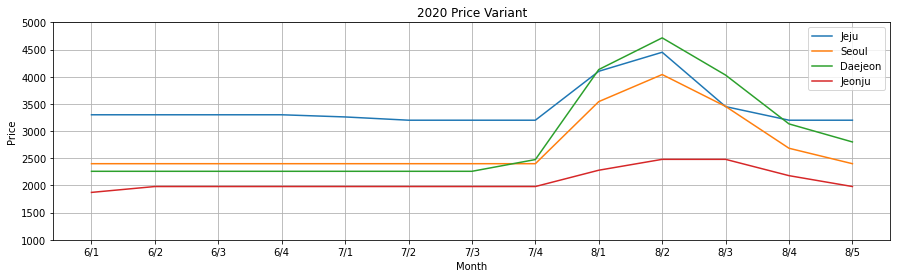

In [122]:
line = df_2020.plot.line()
line.set_xlabel("Month")
line.set_ylabel("Price")
plt.ylim([1000, 5000])
line.set_title("2020 Price Variant")
line.set_xticks(df_2020.index[:])
line.set_xticklabels(month_week_list)
plt.plot
plt.show()